# Part I - (Dataset Exploration Title)
## by  Tunji Abdulfatai

## Introduction
>  This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.




## Preliminary Wrangling


In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [13]:
#load dataset in pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [14]:
#exploring the data structure
print(loan.info)

<bound method DataFrame.info of                      ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000

In [15]:
#selecting variables of interest
cols =['LoanStatus','ListingCategory (numeric)','BorrowerAPR','BorrowerRate','BorrowerState','ProsperRating (Alpha)','ProsperScore','Occupation','EmploymentStatus','EmploymentStatusDuration','AvailableBankcardCredit','LoanOriginalAmount','IncomeRange','StatedMonthlyIncome','Investors']
df_loan = loan[cols]

In [16]:
#exploring data
print(df_loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   BorrowerState              108422 non-null  object 
 5   ProsperRating (Alpha)      84853 non-null   object 
 6   ProsperScore               84853 non-null   float64
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   EmploymentStatusDuration   106312 non-null  float64
 10  AvailableBankcardCredit    106393 non-null  float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  IncomeRange                113937 non-null  object 
 13  StatedMonthlyIncome        11

In [17]:
#dropping duplicates
df_loan.drop_duplicates()

,LoanStatus,ListingCategory (numeric),BorrowerAPR,BorrowerRate,BorrowerState,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,EmploymentStatusDuration,AvailableBankcardCredit,LoanOriginalAmount,IncomeRange,StatedMonthlyIncome,Investors
0,Completed,0,0.16516,0.1580,CO,NaN,NaN,Other,Self-employed,2.0,1500.0,9425,"$25,000-49,999",3083.333333,258
1,Current,2,0.12016,0.0920,CO,A,7.0,Professional,Employed,44.0,10266.0,10000,"$50,000-74,999",6125.000000,1
2,Completed,0,0.28269,0.2750,GA,NaN,NaN,Other,Not available,NaN,NaN,3001,Not displayed,2083.333333,41
3,Current,16,0.12528,0.0974,GA,A,9.0,Skilled Labor,Employed,113.0,30754.0,10000,"$25,000-49,999",2875.000000,158
4,Current,2,0.24614,0.2085,MN,D,4.0,Executive,Employed,44.0,695.0,15000,"$100,000+",9583.333333,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,Current,1,0.22354,0.1864,IL,C,5.0,Food Service Management,Employed,246.0,1886.0,10000,"$50,000-74,999",4333.333333,1
113933,FinalPaymentInProgress,7,0.13220,0.1110,PA,A,8.0,Professional,Employed,21.0,6658.0,2000,"$75,000-99,999",8041.666667,22
113934,Current,1,0.23984,0.2150,TX,D,3.0,Other,Employed,84.0,7853.0,10000,"$25,000-49,999",2875.000000,119
113935,Completed,2,0.28408,0.2605,GA,C,5.0,Food Service,Full-time,94.0,4137.0,15000,"$25,000-49,999",3875.000000,274


In [18]:
#drop rows with no prosper rating
df_loan = df_loan[df_loan['ProsperRating (Alpha)'].notnull()]

In [19]:
#filling missing values in occupation and employment status duration
df_loan.Occupation = df_loan.Occupation.fillna('Unknown')
df_loan.EmploymentStatusDuration = df_loan.EmploymentStatusDuration.fillna(0)

In [87]:
df_loan['IncomeRange'].unique()

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed', '$0'], dtype=object)

In [92]:
#convert prosper rating, prosper score, and Income range into ordered categorical data
dictionary= {'ProsperRating (Alpha)':['HR','E','D','C','B','A','AA'], 'ProsperScore':[1,2,3,4,5,6,7,8,9,10,11], 'IncomeRange':['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999', '$100,000+']}
for var in dictionary:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = dictionary[var])
    df_loan[var] = df_loan[var].astype(ordered_var)

In [91]:
#checking out subdata for cleaniness
print(df_loan.info())
df_loan.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LoanStatus                 84853 non-null  object  
 1   ListingCategory (numeric)  84853 non-null  int64   
 2   BorrowerAPR                84853 non-null  float64 
 3   BorrowerRate               84853 non-null  float64 
 4   BorrowerState              84853 non-null  object  
 5   ProsperRating (Alpha)      84853 non-null  category
 6   ProsperScore               84853 non-null  category
 7   Occupation                 84853 non-null  object  
 8   EmploymentStatus           84853 non-null  object  
 9   EmploymentStatusDuration   84853 non-null  float64 
 10  AvailableBankcardCredit    84853 non-null  float64 
 11  LoanOriginalAmount         84853 non-null  int64   
 12  IncomeRange                84853 non-null  category
 13  StatedMonthlyIncome        848

,LoanStatus,ListingCategory (numeric),BorrowerAPR,BorrowerRate,BorrowerState,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,EmploymentStatusDuration,AvailableBankcardCredit,LoanOriginalAmount,IncomeRange,StatedMonthlyIncome,Investors
1,Current,2,0.12016,0.0920,CO,A,7,Professional,Employed,44.0,10266.0,10000,"$50,000-74,999",6125.000000,1
3,Current,16,0.12528,0.0974,GA,A,9,Skilled Labor,Employed,113.0,30754.0,10000,"$25,000-49,999",2875.000000,158
4,Current,2,0.24614,0.2085,MN,D,4,Executive,Employed,44.0,695.0,15000,"$100,000+",9583.333333,20
5,Current,1,0.15425,0.1314,NM,B,10,Professional,Employed,82.0,86509.0,15000,"$100,000+",8333.333333,1
6,Current,1,0.31032,0.2712,KS,E,2,Sales - Retail,Employed,172.0,1929.0,3000,"$25,000-49,999",2083.333333,1


### What is the structure of your dataset?

> The final data after wrangling consists of 84853 observations with 13 variables(Loan Status, Borrower Rate, Borrower APR, Borrower State, Prosper Rating(Alpha), Prosper Score, Occupation, Employment Status, Employment Status Duration, Available Bank card Credit, Income Range, Stated Monthly Income, Original loan amount and Investors). Some are numeric while others are non numeric.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in the factors that are best in predicting the loan original amount and the Borrower APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features i expect to support my investigation includes prosper score, loan status, income range, available bank card credit,and employment status.

## Univariate Exploration



### Prosper Rating
The prosper rating ranges between HR - AA with HR being the worst and AA the best.

### Prosper Score
A custom risk score built using historical Prosper data. The score ranges from 1-11, with 11 being the best, or lowest risk score.

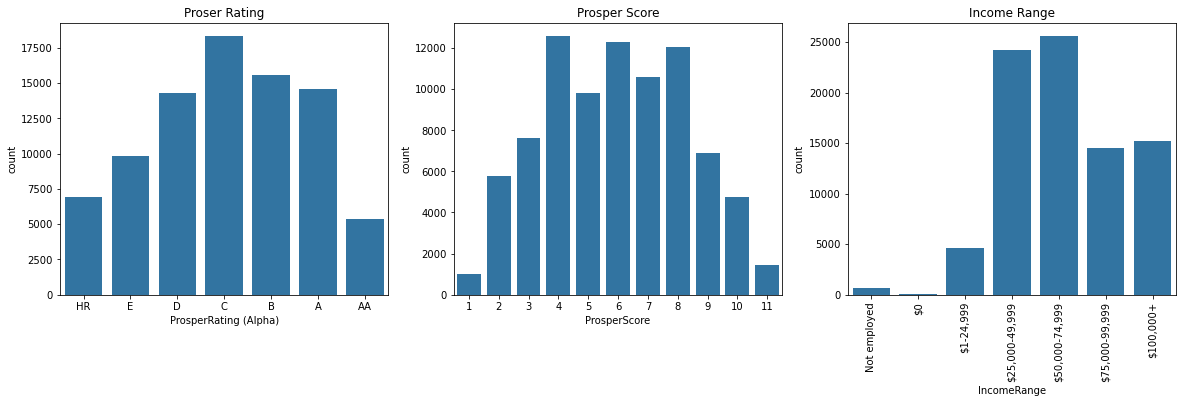

In [93]:
##barcharts for the ordinal variables of Prosper Score, Prosper Rating and loan Status
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
base_color = sb.color_palette()[0]
sb.countplot(data=df_loan,x='ProsperRating (Alpha)',color=base_color);
plt.title('Proser Rating')
plt.subplot(1,3,2)
sb.countplot(data=df_loan,x='ProsperScore',color=base_color);
plt.title('Prosper Score')
plt.subplot(1,3,3)
sb.countplot(data=df_loan,x='IncomeRange',color = base_color);
plt.title('Income Range');
plt.xticks(rotation=90);

The Prosper rating chart shows a similar distribution from the left to the right. The median rating 'C' also happens to be the modal rating. AA has the minimum number between 4500-5000 in the group.

The prosper score bar chart is quite similar to the Prosper ratings chart in the fact that the least represented numbers are for the extreme scores while the highly represented ones are in the middle.

The most represented income range is $ 50,000 - 75,000.

The prosper score bar chart is quite similar to the Prosper ratings chart in the fact that the least represented numbers are for the extreme scores while the highly represented ones are in the middle.

Now, I will explore the Listing Category to see what people have been borrowing money for.

### Listing Category
The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

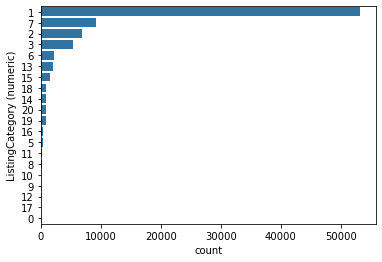

In [74]:
#using count plots to explore the listing category
type_counts = df_loan['ListingCategory (numeric)'].value_counts()
type_order = type_counts.index
base_color = sb.color_palette()[0]
sb.countplot(data=df_loan, y='ListingCategory (numeric)', color=base_color, order=type_order);

From the chart, it can be seen that majority of the loan was acquired for debt consolidation. What follows is the 'others' category of listing then we have 'home improvement' and 'business' respectively.

### Loan Original Amount
The origination amount of the loan.

In [45]:
#checking describe in log form
np.log10(df_loan['LoanOriginalAmount'].describe())

count    4.928667
mean     3.958250
std      3.798503
min      3.000000
25%      3.602060
50%      3.875061
75%      4.130334
max      4.544068
Name: LoanOriginalAmount, dtype: float64

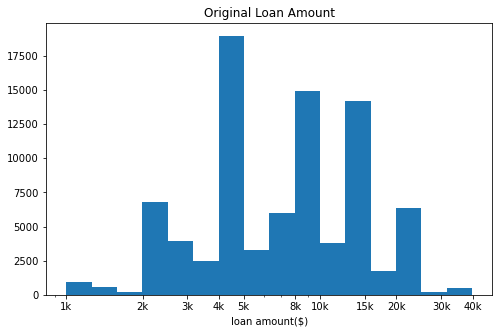

In [56]:
plt.figure(figsize=[8,5])
bins = 10 ** np.arange(3, 4.54+0.1, 0.1)
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('loan amount($)')
plt.xscale('log')
plt.xticks([1e3,2e3,3e3,4e3,5e3,8e3,1e4,15e3,2e4,3e4,4e4], ['1k','2k','3k','4k', '5k','8k', '10k','15k','20k','30k','40k'])
plt.title('Original Loan Amount')
plt.show()

The distribution of the loan amount on standard scale has a long tailed distribution. Therefore,a log scale is applied to it. Using a log scale shows a major peak between $ 4000 - $ 5000 and two minor peaks, one betwen $ 14000 - $ 15000 and the other between $ 20000 - $ 25000. The distribution appears to be two tailed.

### Stated Monthly Income
The monthly income the borrower stated at the time the listing was created.

In [95]:
#checking describe in log form
np.log10(df_loan['StatedMonthlyIncome'].describe())

C:\Users\USER\Anaconda3\ANACONDA\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    4.928667
mean     3.773141
std      3.915924
min          -inf
25%      3.535800
50%      3.698970
75%      3.850238
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

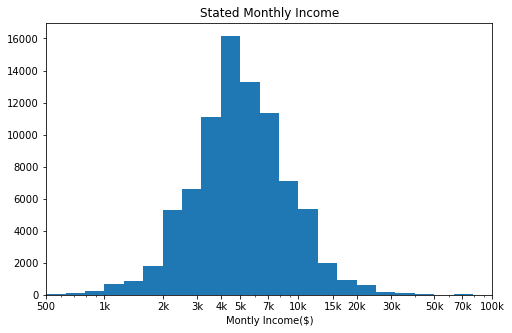

In [72]:
plt.figure(figsize=[8,5])
bins = 10 ** np.arange(0, 6.24+0.1, 0.1)
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('Montly Income($)')
plt.xscale('log')
plt.xticks([500,1e3,2e3,3e3,4e3,5e3,7e3,1e4,15e3,2e4,3e4,5e4,7e4,1e5], [500,'1k','2k','3k','4k', '5k','7k', '10k','15k','20k','30k','50k','70k','100k'])
plt.xlim(500,1e5)
plt.title('Stated Monthly Income')
plt.show()

For the stated monthly income, a log scale is used due to the very wide range of data given. The plot was zoomed in using xlim between 500-100000. The plot follows a normal distribution with a single peak at about $ 5000. It is a two tailed plot with the right tail slightly longer.

Lets explore the borrower rate

### Borrower's Rate
The Borrower's interest rate for this loan. 

In [101]:
df_loan['BorrowerRate'].describe()

count    84853.000000
mean         0.196022
std          0.074631
min          0.040000
25%          0.135900
50%          0.187500
75%          0.257400
max          0.360000
Name: BorrowerRate, dtype: float64

Text(0.5, 1.0, 'Borrower APR distribution')

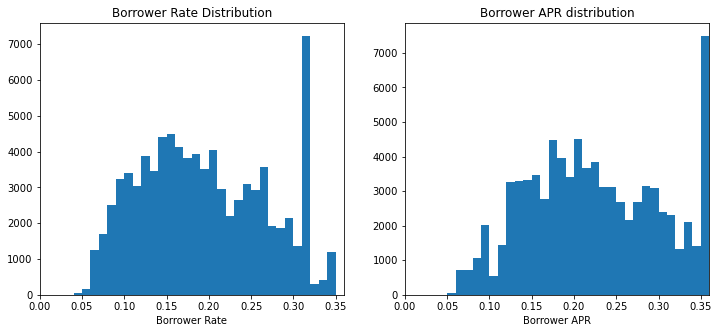

In [138]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
binsize = 0.01
bins = np.arange(0, df_loan['BorrowerRate'].max()+binsize, binsize)
plt.hist(data= df_loan,x='BorrowerRate',bins=bins);
plt.xlim([0,0.36])
plt.xlabel('Borrower Rate')
plt.title('Borrower Rate Distribution');

plt.subplot(1,2,2)
binsize = 0.01
bins = np.arange(0, df_loan['BorrowerAPR'].max()+binsize,binsize)
plt.hist(data= df_loan,x='BorrowerAPR',bins=bins)
plt.xlim([0,0.36])
plt.xlabel('Borrower APR')
plt.title('Borrower APR distribution')

The borrower rate distribution indicates a peakjust around 0.31 and 0.32. The histogram just cuts off to an end at 0.35 rather than running a tail. The APR distribution is similar too but with a peak between 0.35 and 0.36

### Investors
The number of investors that funded the loan.

In [110]:
np.log10(df_loan['Investors'].describe())

count    4.928667
mean     1.834196
std      1.978618
min      0.000000
25%      0.000000
50%      1.505150
75%      1.986772
max      3.075182
Name: Investors, dtype: float64

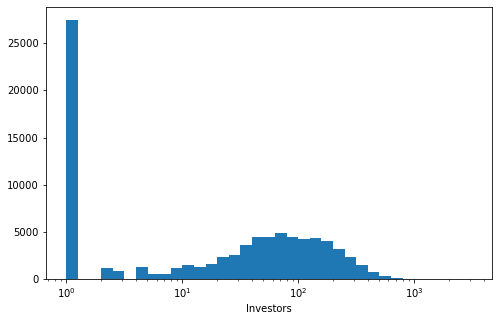

In [115]:
# distribution for investors
plt.figure(figsize=[8,5])
bins = 10 ** np.arange(0, 3.1+0.5, 0.1)
plt.hist(data = df_loan, x = 'Investors', bins = bins);
plt.xlabel('Investors')
plt.xscale('log')

a log transform was applied to the plot after the initial plot retrned a long tailed distribution. from the log-scaled distribution, it can be seen that majority of the investors per loan is one

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Prosper rating chart shows a similar distribution from the left to the right. The median rating 'C' also happens to be the modal rating. AA has the minimum number between 4500-5000 in the group.
> The distribution of the loan amount on standard scale has a long tailed distribution. Therefore,a log scale is applied to it. Using a log scale shows a major peak between  4000−  5000 and two minor peaks, one betwen  14000−  15000 and the other between  20000−  25000. The distribution appears to be two tailed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data was further wrangled after importing it. First, 14 features which i consider to be most important were extracted out of 81, duplicate data was removed, loans without prosper rating were also removed. Prosper score, rating, and Income range features were converted to categorical ordinal data types.

>a log transform was applied to the Investor's plot after the initial plot retrned a long tailed distribution. from the log-scaled distribution, it can be seen that majority of the investors per loan is one and the borrower rate distribution indicates a peakjust around 0.31 and 0.32. The histogram just cuts off to an end at 0.35 rather than running a tail.

## Bivariate Exploration


To start off, we look at the pairwise correlation between the features present in the data.

In [198]:
#creating a list of numerical and categorical variables
num_vars = ['LoanOriginalAmount', 'BorrowerAPR','AvailableBankcardCredit','StatedMonthlyIncome','Investors']
cat_vars = ['ProsperRating (Alpha)','ProsperScore','EmploymentStatus','Occupation','IncomeRange']

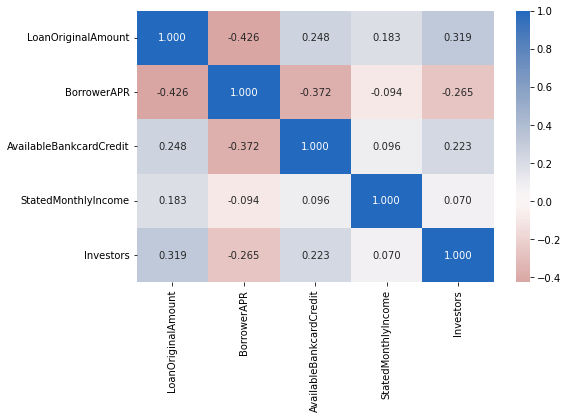

In [193]:
#correlation plot
plt.figure(figsize = [8,5])
sb.heatmap(df_loan[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

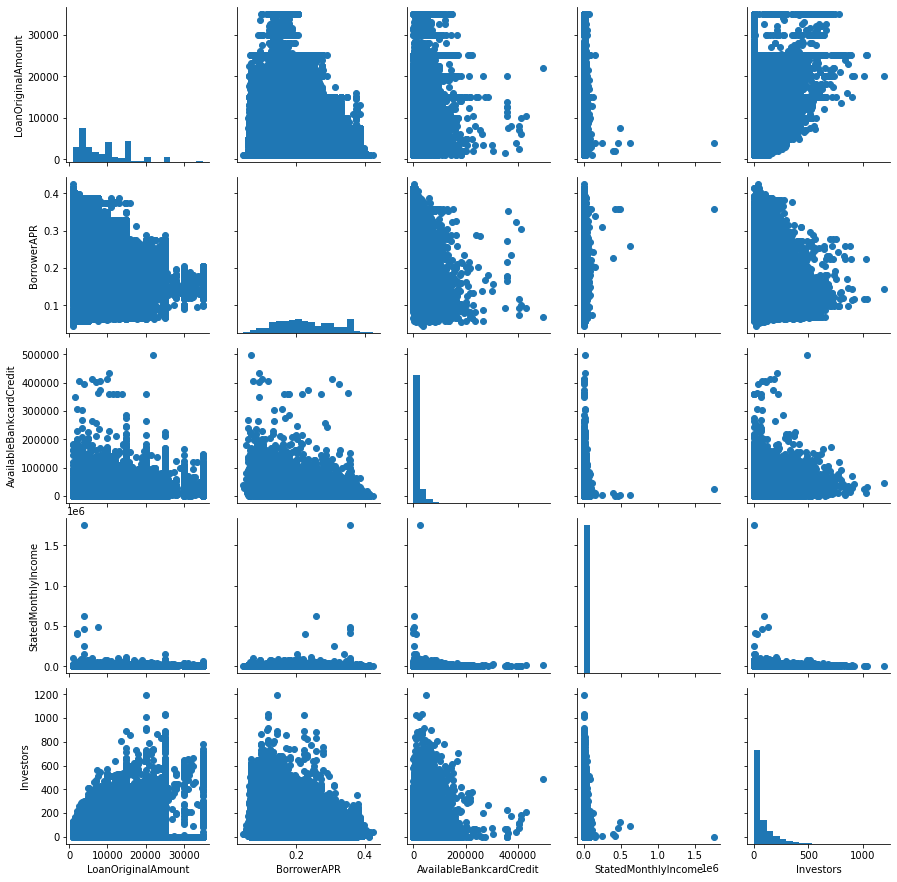

In [194]:
#plot matrix
g = sb.PairGrid(data = df_loan, vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter);

The relationship between Borrower APR and Loan Original Ammount which indicates a strong negative correlation of -0.426 which indicates that the higher the original loan ammount, the lower the Borrower APR.

Also, the relationship between the borrower APR and the available bank credit also shows a significant negative correlation of -0.372 which indicates that the Available bank credit could influence the Borrower APR.

The correlation between the available bank credit and the loan original amount is positive (0.248) which points to the possibility of giving higher loans to higher bank credit card holders.

The number of investors has a positive correlation with the Loan Original amount and the available bank credit which suggests that higher loan amount and higher bank credits attracts more investors and vice versa.

Next, I look at the the relationship between some categorical and numerical data

C:\Users\USER\Anaconda3\ANACONDA\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\USER\Anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\Anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\Anaconda3\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword

<Figure size 720x720 with 0 Axes>

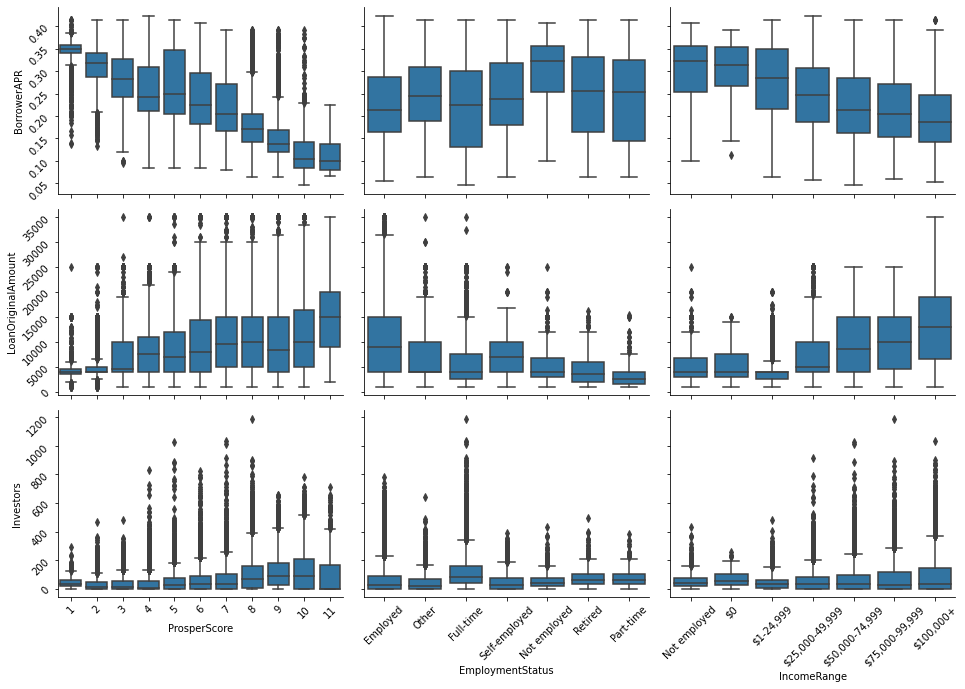

In [209]:
#box plots
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars =['BorrowerAPR','LoanOriginalAmount','Investors'] , x_vars =['ProsperScore','EmploymentStatus','IncomeRange'] ,size = 3, aspect = 1.5)
g.map(boxgrid)
for ax in g.axes.flatten():
    ax.tick_params(rotation = 45)
plt.show();

The boxplot has rather given some interesting revelations. 

Firstly, there is a negative relationship between the Borrower APR and the Prosper score. This tells us that loans with low prosper score have a high borrower APR and vice versa. This relationship is also similar to the relationship between Borrower APR and Income Range, also an indication that the higher the income received, the lower the borrower APR. 

Secondly, the Loan Original Amount and prosper score are positively related, an indication that higher ammounts are given to borrowers with a good prosper score. There's also a positive relationship between the Loan Original ammount and Income range. Higher ammounts are given to borrowers within higher income ranges and vice versa. Another important point worthy of note is that the average loan given to those with 0 income is higher than that given to the income range of $ 1-24999. It is suspected that those with 0 income are probably students who applied for student loans. This will require further analysis.

Lastly,the plot indicates that investors invest more in borrowers with full-time employment compared to other clases of employment. Also, there are more investors for higher categories of income range and less investors for the lower categories.

Now, lets look at the categorical variables

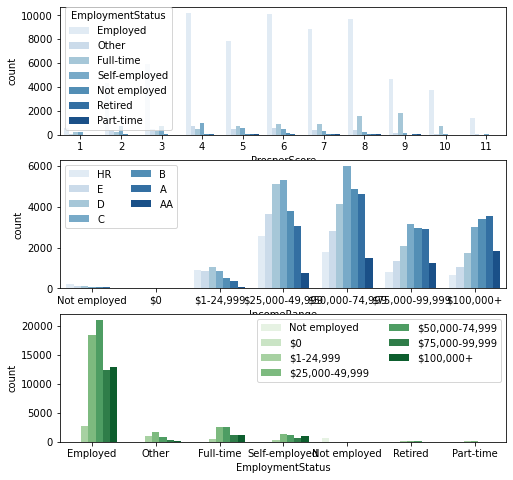

In [212]:
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = df_loan, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_loan, x ='IncomeRange' , hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

These plots dont say much. But the most significant observation here is from the relationship between income range and prosper ratings relationship and it can be seen that borrowers with high income are highly rated.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The loan original amount increases with an increase in the number of investors, Prosper score, and Income range.

> The borrower APR decreases with an increase in prosper score,income range, and available bank credit.

> The two main features of interest turns out to have a negative relationship between them.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Number of Investors increases with the income range and also income range and prosper ratings increases with each other therefore showing a positive relationship between the pair.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

I'm starting off by looking at the relationship between the two features of interest and prosper rating.

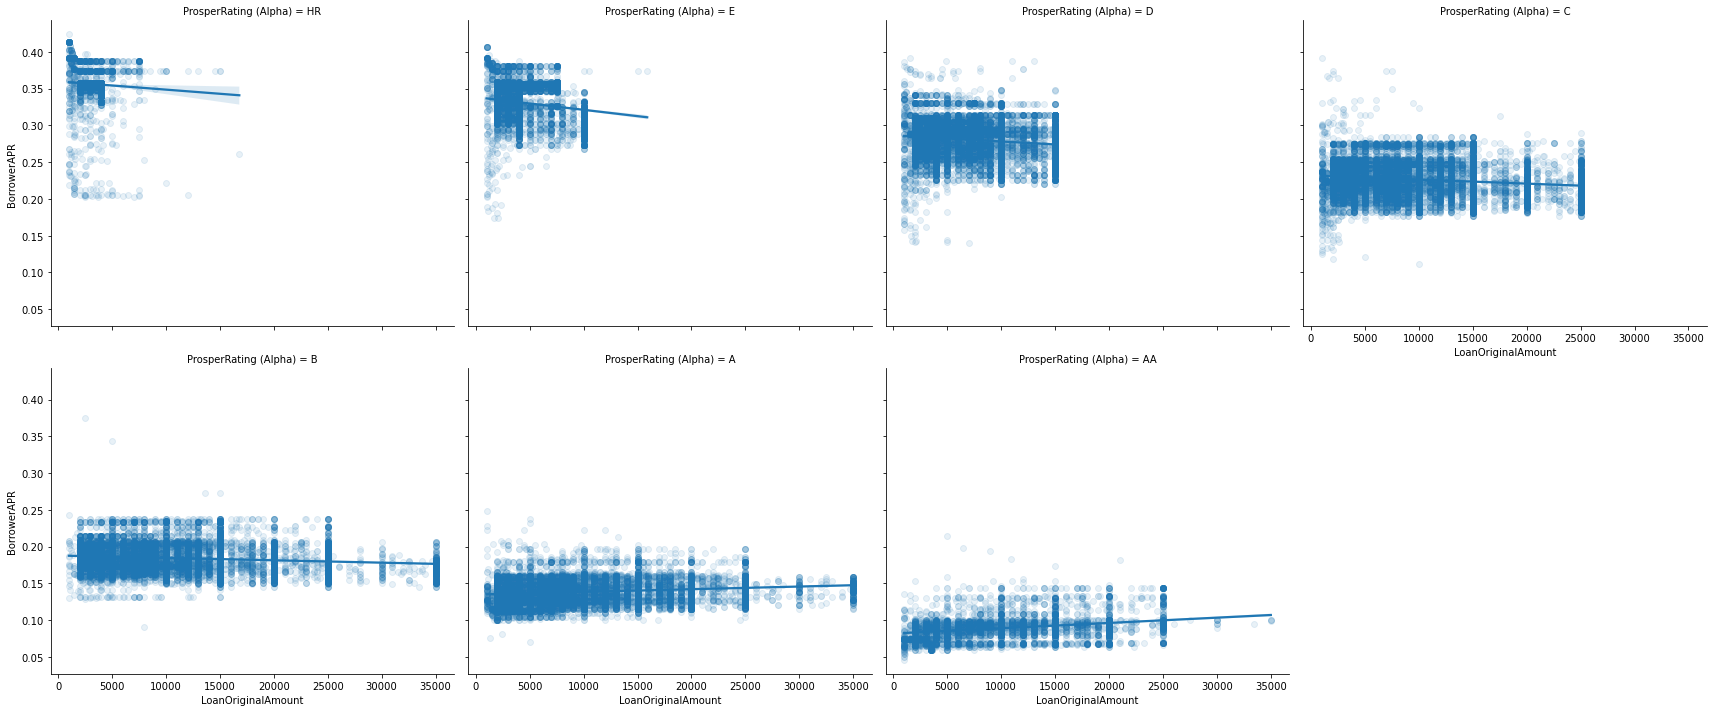

In [213]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df_loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

From the plot, it can be seen that the APR is high for low prosper ratings while the loan amount is also low when the ratings are low. It is interesting to see that the relationship between Borrower APR and Loan original ammount changes from negative to positive as the prosper ratings got better.

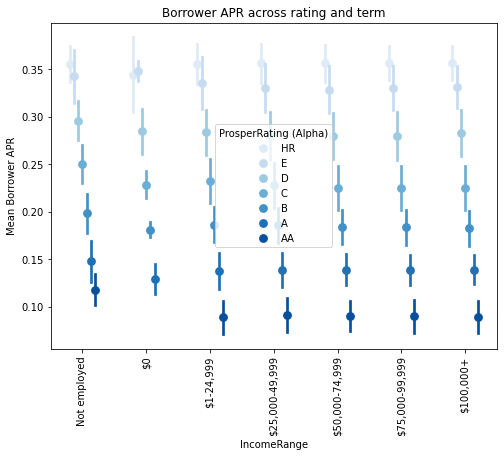

In [216]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'ProsperRating (Alpha)',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

The plot indicates that borrowers within the high income range gets lowe APR and good prosper rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I further explored the relationship between the two variables of interest with a third variable of prospers rating. It indicated that low ratings attract high APR and low loan ammounts. While high ratings is associated with low APR and high loan amounts.

### Were there any interesting or surprising interactions between features?

> A surprising interaction is the relationship between borrower APR and Loan amount moving from negative to positive as the prosper ratings changes from HR to AA.

## Conclusions
> This prosper loan analysis started with some wrangling where a subset of variables were first extracted for exploration. Variables were first explored univariatly before moving to bivariate and multivariate exploration. The visualization revealed a couple of interesting insights and observations about the loan data.

> The borrower APR is high for loans that are small and bigger loans attract small APR. This appears to be so just to encourage borrowers to go for bigger loans which brings back more money to the investors.

> The prosper score and rating has a big influence on the amount given to borrowers. Borrowers with good ratings are given larger amount of loan compared to those with poor ratings.


In [222]:
# save wrangled data for reusability
df_loan.to_csv('Loan_cleaned.csv')